# Spam Comments Detection

The goal of this task is to classify comments as *Spam* or *Not Spam* using the **YouTube spam comments** dataset.


## Table of Contents
1. [Introduction and Dataset Overview](#intro)
2. [Initial Data Exploration (EDA)](#eda)
3. [Data Preparation for the Model](#preprocessing)
4. [Model Building and Training](#model)
5. [Result Evaluation and Testing](#test)
6. [Additional Steps and Suggestions:](#conclusion)

---
### Dataset Information
*You can use a dataset named `Youtube.csv` (or similar files)*
- **CONTENT_az** column: Comment text.
- **CLASS** column: Contains a value of 0 (Not Spam) or 1 (Spam).

### Objective
 - Build a model that classifies the given comments as `Spam` or `Not Spam`.


---

## 1. Introduction and Dataset Overview <a id="intro"></a>


In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score,classification_report

In [81]:



df = pd.read_csv("Youtube.csv")
df.head()

,COMMENT_ID,AUTHOR,DATE,CLASS,CONTENT_az
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,1,"Huh, hər halda bu youtube] kanalına baxın: kob..."
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,1,Salam uşaqlar mənim yeni kanalıma və ilk video...
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,1,sırf test üçün murdev.com deməliyəm
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,1,kanalımda seksual götümü silkələyirəm ^_^ ﻿
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,1,watch?v=vtaRGgvGtWQ Bunu yoxlayın .﻿


In [82]:
df.tail()

,COMMENT_ID,AUTHOR,DATE,CLASS,CONTENT_az
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,0,Planetdə yalnız mən olduğum halda bunun necə 2...
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,0,2014-cü ildə buna niyə baxdığımı indi bilmirəm
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,1,Call of duty videoları və Hədəf-100 abunələri ...
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,1,salam uşaqlar zəhmət olmasa mənim android foto...
349,z13vhvu54u3ewpp5h04ccb4zuoardrmjlyk0k,Ray Benich,2015-06-05T18:05:16,0,İlk milyardlar bunun həqiqətən gözəl olduğunu ...


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CLASS       350 non-null    int64 
 4   CONTENT_az  350 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [84]:
df.describe(include=object)

,COMMENT_ID,AUTHOR,DATE,CONTENT_az
count,350,350,350,350
unique,350,345,350,349
top,z13vhvu54u3ewpp5h04ccb4zuoardrmjlyk0k,Young IncoVEVO,2015-06-05T18:05:16,PSY - GANGNAM STYLE (Gangnam Style) M/V: http:...
freq,1,2,1,2


## 2. Initial Data Exploration (EDA) <a id="eda"></a>


In [85]:
df.isnull().sum()


COMMENT_ID    0
AUTHOR        0
DATE          0
CLASS         0
CONTENT_az    0
dtype: int64

In [86]:
gen_average_length = df['CONTENT_az'].str.len().mean()

gen_average_length

np.float64(87.87428571428572)

In [87]:
spam_average_length = df[df['CLASS']==1]['CONTENT_az'].str.len().mean()

spam_average_length

np.float64(107.35428571428571)

In [88]:
non_spam_av_length = df[df['CLASS']==0]['CONTENT_az'].str.len().mean()

non_spam_av_length

np.float64(68.39428571428572)

(0.0, 400.0)

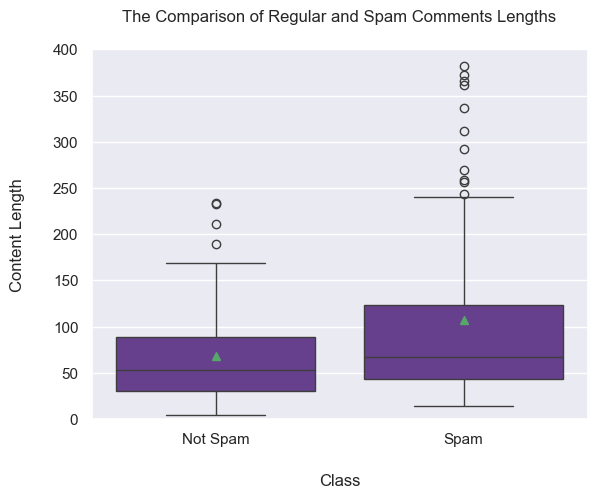

In [89]:
sns.boxplot(x = df['CLASS'], y =df['CONTENT_az'].str.len(), color='rebeccapurple', showmeans=True )

sns.set_theme(style='darkgrid')

plt.xlabel(xlabel= 'Class', labelpad= 20)
plt.ylabel(ylabel= 'Content Length', labelpad= 20)

plt.xticks (ticks=[0, 1],labels=['Not Spam', 'Spam'])

plt.title('The Comparison of Regular and Spam Comments Lengths', pad= 20)

plt.ylim(0, 400)


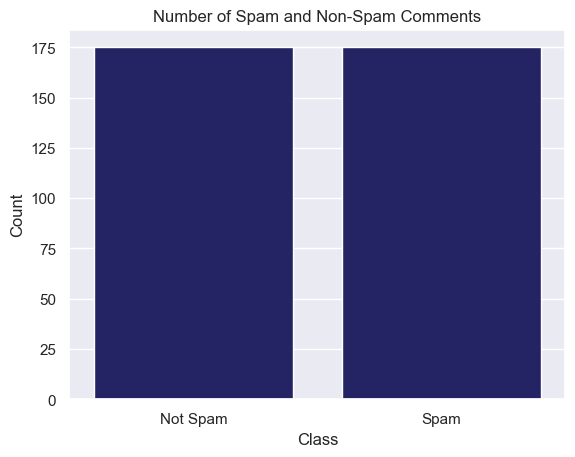

In [90]:
sns.countplot(x = df['CLASS'], color='midnightblue' )
plt.xticks(ticks=[0, 1], labels=['Not Spam', 'Spam'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Number of Spam and Non-Spam Comments")
plt.show()

## 3. Data Preparation for the Model <a id="preprocessing"></a>


In [ ]:
X = df['CONTENT_az']
y = df['CLASS']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

## 4. Model Building and Training <a id="model"></a>


In [93]:

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=500)),
    ('classifier', BernoulliNB())
])


pipeline.fit(X_train, y_train)


train_pred = pipeline.predict(X_train)

y_pred = pipeline.predict(X_test)


report1 = classification_report(y_train, train_pred)
report = classification_report(y_test, y_pred)
print(report1)

print(report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       127
           1       1.00      0.90      0.95       118

    accuracy                           0.95       245
   macro avg       0.96      0.95      0.95       245
weighted avg       0.96      0.95      0.95       245

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        48
           1       1.00      0.89      0.94        57

    accuracy                           0.94       105
   macro avg       0.94      0.95      0.94       105
weighted avg       0.95      0.94      0.94       105



## 5. Result Evaluation and Testing <a id="test"></a>


In [94]:

sample = [
    "Check this out: https://thecleverprogrammer.com/",
    "Lack of information!",
    "I don't like this content"
]

predictions = pipeline.predict(sample)


predictions

array([1, 0, 0])

## 6. Additional Steps and Suggestions: <a id="conclusion"></a>
>
> - Consider comparing different machine learning models for better performance, such as Support Vector Machines (SVM), Logistic Regression, and XGBoost.
> - Explore hyperparameter tuning using GridSearchCV or RandomizedSearchCV to optimize model parameters for improved accuracy.
> - Enhance the dataset by extracting additional features from the comments, such as sentiment analysis scores, keyword counts, or part-of-speech tagging, to help improve classification.



